In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [42]:
# Load the dataset and set the column names
df = pd.read_csv('Dataset/ratings_Electronics.csv' ,names=['userId', 'productId','rating','timestamp'])

In [43]:
# See shape
df.shape

(7824482, 4)

In [44]:
# See columns
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

The dataset contains over 7.8 million entries. 
Taking 200000 random entries from the dataset as a sample because the dataset is too large.

In [45]:
product_data = df.sample(n=2000000, ignore_index=True)

In [46]:
# delete the previous dataframe to release the memory
del df

In [47]:
# See the top 5 records of the dataframe
product_data.head()

,userId,productId,rating,timestamp
0,A26LI2QS0LHKOT,B005U7O0YU,4.0,1325635200
1,A3H8QXSDLBYA0A,B0038R9C8I,5.0,1361404800
2,A2C1AHZEFR0WIH,B004RCUIJU,5.0,1328140800
3,A2R5GW7HMGBBUI,B007PRHNHO,5.0,1403136000
4,A3V0LTZ2W7PBC0,B000A6PPOK,2.0,1379635200


In [48]:
# See information of the dataframe
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.0+ MB


In [49]:
 # Delete the unnecessary timestamp column
product_data.drop('timestamp', axis=1, inplace=True)

In [50]:
# See data description
product_data.describe()

,rating
count,2.000000e+06
mean,4.010198e+00
std,1.381759e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [51]:
# Count null values
product_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [52]:
# Count duplicated values
product_data.duplicated().sum()

0

Proceeding forward due to zero null and duplicated values

Displaying Rating Distribution as a graph

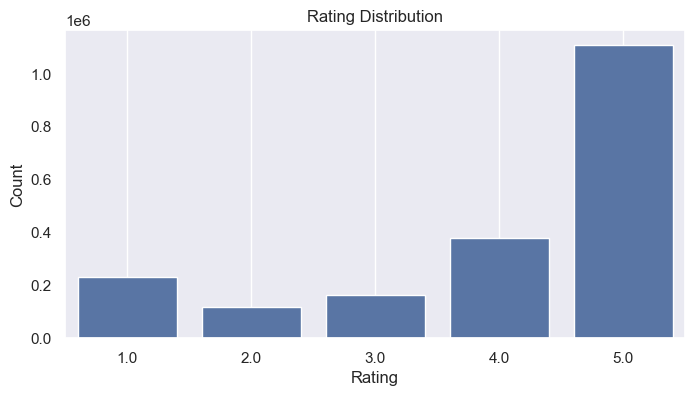

In [53]:
# Set size of the figure
plt.figure(figsize=(8,4))

# Creates a count plot based on the 'rating' column
sns.countplot(x='rating',data=product_data)

# Adds a title to the plot
plt.title('Rating Distribution')

# Adds a label to the x-axis
plt.xlabel('Rating')

# Adds a label to the y-axis
plt.ylabel('Count')

# Adds a grid to the plot
plt.grid()

# Displays plot
plt.show()

Analyzing the rating by user

In [54]:
print('Total rating : ',product_data.shape[0])
print('Total unique users : ',product_data['userId'].nunique())
print('Total unique products : ',product_data['productId'].nunique())

Total rating :  2000000
Total unique users :  1502545
Total unique products :  267260


In [58]:
# Counting the number of rated products per user
no_of_rated_products_per_user = product_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A3OXHLG6DIBRW8    135
A5JLAU2ARJ0BO     132
ADLVFFE4VBT8      130
A6FIAB28IS79      107
A680RUE1FDO8B     107
Name: rating, dtype: int64

In [57]:
# Counting the number of users who have rated more than 50 products
print('Number of users who have rated more than 50 products : {} '.format(sum(no_of_rated_products_per_user >= 50)))

Number of users who have rated more than 50 products : 54 


## Popularity Based Recommendation
To suggest products to user who just signed up

In [59]:
# Filtering the products with more than 50 ratings and making a new dataframe
data = product_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [61]:
data.head()

,userId,productId,rating
0,A26LI2QS0LHKOT,B005U7O0YU,4.0
3,A2R5GW7HMGBBUI,B007PRHNHO,5.0
4,A3V0LTZ2W7PBC0,B000A6PPOK,2.0
6,A8HAQBJ81BD0Z,B0002U1TJY,4.0
7,A39S9NXOMT36PQ,B00328HR76,4.0


In [62]:
# Calculating the number of ratings per product
# Sorting the results in the descending order 
no_of_rating_per_product = data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [63]:
no_of_rating_per_product.head()

productId
B0074BW614    4642
B00DR0PDNE    4222
B007WTAJTO    3654
B0019EHU8G    3194
B006GWO5WK    3187
Name: rating, dtype: int64

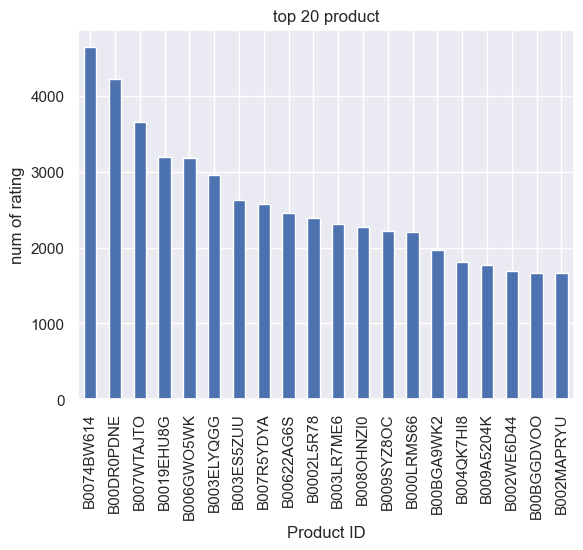

In [64]:
# Creates a bar plot of the top 20 most rated products
no_of_rating_per_product.head(20).plot(kind='bar')

# Adds a title to the plot
plt.title('top 20 product')

# Adds label to the x-axis
plt.xlabel('Product ID')

# Adds label to the x-axis
plt.ylabel('num of rating')

# Displays plot
plt.show()

In [65]:
# Calculating the average rating for each product
# Creating a new dataframe from that data
mean_rating_per_product = pd.DataFrame(data.groupby('productId')['rating'].mean())

In [66]:
mean_rating_per_product.head()

,rating
productId,
0972683275,4.492308
1400501466,3.576271
1400532655,3.696000
140053271X,3.876106
9573212919,3.849057


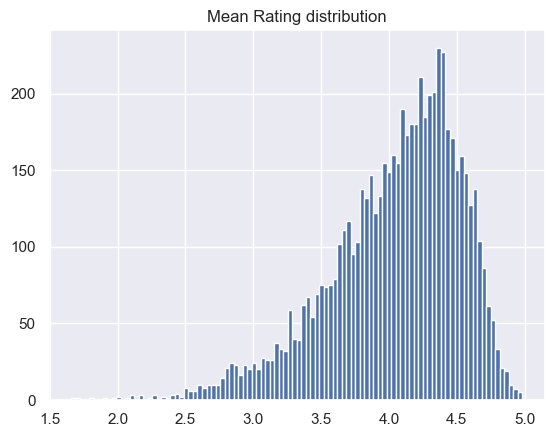

In [70]:
# Creates histogram with 100 bins
plt.hist(mean_rating_per_product['rating'],bins=100)

# Adds a title to the histogram 
plt.title('Mean Rating distribution')

# Displays histogram
plt.show()

In [71]:
# Checking the skewness of the mean rating data
mean_rating_per_product['rating'].skew()

-0.8930261819093388

Moderately negatively skewed 

In [76]:
# Adding a rating_count column to the mean_rating_per_product dataframe
mean_rating_per_product['rating_counts'] = data.groupby('productId')['rating'].count()

In [77]:
mean_rating_per_product.head()

,rating,rating_counts
productId,,
0972683275,4.492308,260
1400501466,3.576271,59
1400532655,3.696000,125
140053271X,3.876106,113
9573212919,3.849057,53


In [78]:
# Finding the product with the highest mean rating
mean_rating_per_product[mean_rating_per_product['rating_counts'] == mean_rating_per_product['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.500862,4642


In [80]:
# The minimum number of ratings a product can have
min_rating_counts = mean_rating_per_product['rating_counts'].min()

# The number of products with the minimum number of ratings
total_min_rating_products = mean_rating_per_product[mean_rating_per_product['rating_counts']==min_rating_counts].shape[0]

print('Minimum rating count for a product :', min_rating_counts)
print('Total products with the minimum rating count :', total_min_rating_products)

min average rating product: 50
total min average rating products: 147


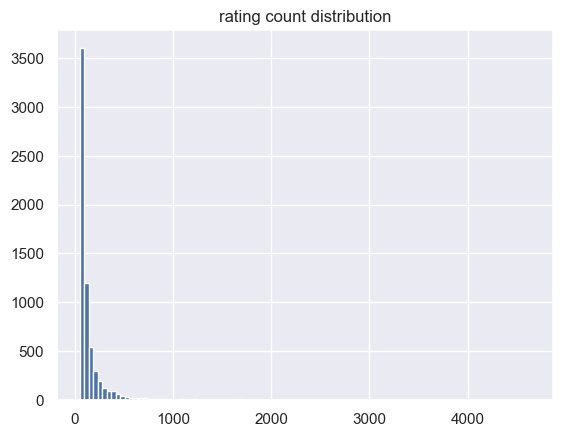

In [81]:
# Creates histogram with 100 bins
plt.hist(mean_rating_per_product['rating_counts'],bins=100)

# Adds a title to the histogram 
plt.title('rating count distribution')

# Displays histogram
plt.show()